In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_parquet('train.parquet')

In [11]:
# Get the Target drug
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Month'] = train_df['Date'].dt.month 
dropoff_rates = train_df.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

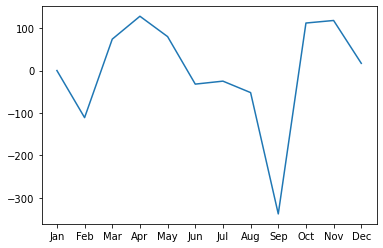

In [12]:
# Extracting the month from the date column
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, dropoff_rates)

In [5]:
# Number of patients who started taking the drug each month
monthly_starts = df_target.groupby('Month')['Patient-Uid'].nunique()

In [6]:
# Number of patients who stopped taking the drug each month
monthly_stops = monthly_starts.diff().fillna(monthly_starts.iloc[0])

In [7]:
#here is the result
print("Patients who took their drug every month:\n", monthly_starts)
print("\nPatients who stopped taking drug each month:\n", monthly_stops)

Patients who took their drug every month:
 Month
2017-02       1
2017-03       2
2017-04       1
2017-05       5
2017-06      11
2017-07       6
2017-08      10
2017-09       6
2017-10       6
2017-11       6
2017-12      14
2018-01      15
2018-02      19
2018-03     472
2018-04     732
2018-05    1042
2018-06    1217
2018-07    1244
2018-08    1522
2018-09    1397
2018-10    1620
2018-11    1661
2018-12    1623
2019-01    1907
2019-02    1596
2019-03    1781
2019-04    1869
2019-05    2207
2019-06    2089
2019-07    2253
2019-08    2457
2019-09    2152
2019-10    2627
2019-11    2383
2019-12    2502
2020-01    2558
2020-02    2517
2020-03    2372
2020-04    2652
2020-05    2728
2020-06    2674
2020-07    2946
2020-08    2383
2020-09     384
Freq: M, Name: Patient-Uid, dtype: int64

Patients who stopped taking drug each month:
 Month
2017-02       1.0
2017-03       1.0
2017-04      -1.0
2017-05       4.0
2017-06       6.0
2017-07      -5.0
2017-08       4.0
2017-09      -4.0
2017-10  

In [8]:
# Drop-off rate percentage
dropoff_rate = monthly_stops / monthly_starts * 100

In [15]:
# Converting to datetime data type
dropoff_rate.index = dropoff_rate.index.to_timestamp()

Month      Incident  Patient-Uid
0        1   DRUG_TYPE_0        11738
1        1   DRUG_TYPE_1        15485
2        1  DRUG_TYPE_10          898
3        1  DRUG_TYPE_11         2690
4        1  DRUG_TYPE_12          310
..     ...           ...          ...
657     12   TEST_TYPE_1         4795
658     12   TEST_TYPE_2          571
659     12   TEST_TYPE_3          550
660     12   TEST_TYPE_4           54
661     12   TEST_TYPE_5           13

[662 rows x 3 columns]

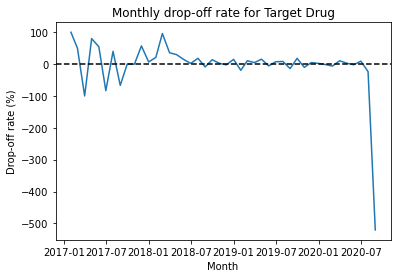

In [18]:
plt.plot(dropoff_rate)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Drop-off rate (%)')
plt.title('Monthly drop-off rate for Target Drug')
plt.show()